In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [47]:
master_df_scaled = pd.read_pickle("../data/processed/master_df_scaled.pkl")
master_df = pd.read_pickle("../data/processed/master_df.pkl")

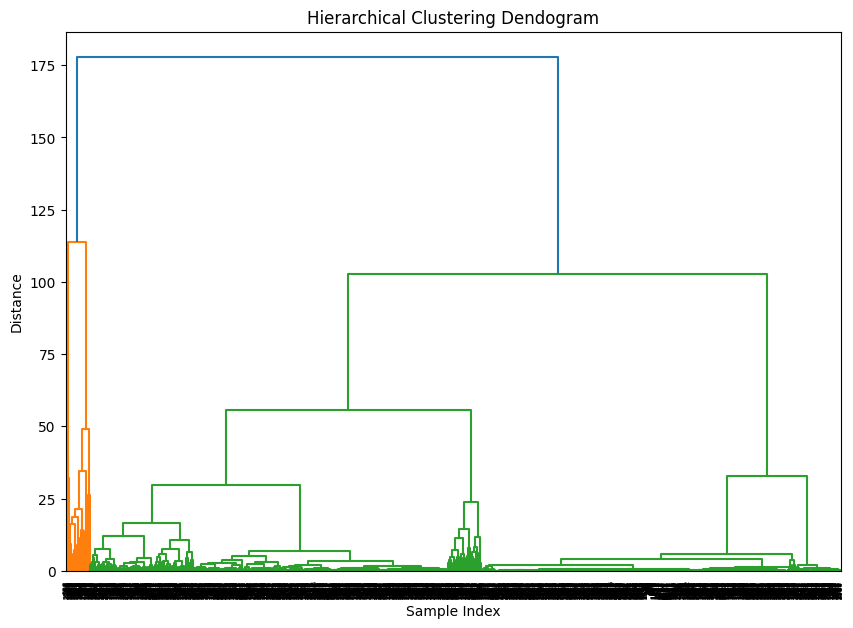

In [48]:
linked = linkage(master_df_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Choose a threshold for the distance to cut the dendrogram
max_d = 6  # This is an example, you should adjust this value based on your dendrogram

# Form clusters based on the chosen threshold
clusters = fcluster(linked, max_d, criterion='distance')

# Add the cluster labels to the original dataframe
master_df_scaled['cluster'] = clusters
master_df['cluster'] = clusters

In [ ]:
# Calculate the silhouette score
sil_score = silhouette_score(master_df_scaled, clusters)
print(f'Silhouette Score: {sil_score}')

# Visualization using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(master_df_scaled)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters of Counties')
plt.colorbar()
plt.show()